In [1]:
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 

In [2]:
processed = str(input("classify train dir: "))
processed = os.path.join(processed, 'classify train')

classify train dir: /mnt/335fff25-d210-4fe2-8249-4ba8b4a17ce4/DATASETS/Health/cov-cxr/2-class/DATASET


# Get Size

In [3]:
height = []
width = []

total = sum([len(files) for r, d, files in os.walk(processed)])

with tqdm(total=total) as pbar:
    for folder_name_1 in os.listdir(processed):
        folder_1 = os.path.join(processed,folder_name_1)
        for folder_name_2 in os.listdir(folder_1):
            folder_2 = os.path.join(folder_1, folder_name_2)
            for classes_name in os.listdir(folder_2):
                file = os.path.join(folder_2, classes_name)
                img = cv2.imread(file)
                height.append(img.shape[0])
                width.append(img.shape[1])
                
                pbar.set_description("Progress")
                pbar.update()

Progress: 100%|██████████| 2660/2660 [00:49<00:00, 53.86it/s]


In [4]:
no = []
i = 0
for i in range(len(height)):
    no.append(i)

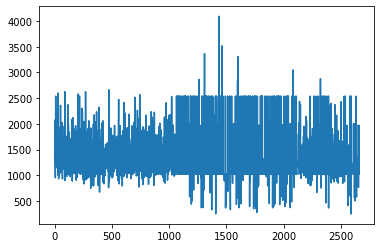

In [5]:
plt.plot(height)

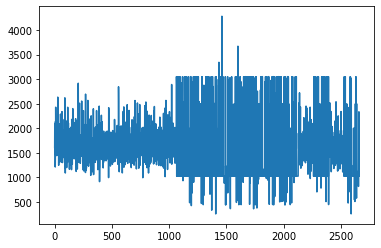

In [6]:
plt.plot(width)

# Visualize Preprocess ?

In [7]:
vp = str(input("Visualize Preprocessings? "))

if vp.upper() == 'Y':
    img_path = str(input("Enter image path: "))
    img_org = cv2.imread(img_path)
    
    img = cv2.imread(img_path)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, thresh_gray = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)
    gray[thresh_gray == 255] = 0
    
    bbox = cv2.boundingRect(gray)
    x, y, w, h = bbox
    foreground = img[y:y+h, x:x+w]
    
    ret, thresh_foreground = cv2.threshold(foreground, 220, 255, cv2.THRESH_BINARY)
    foreground[thresh_foreground == 255] = 0
    
    res = cv2.resize(foreground, (128, 128))
    
    print(res.shape)
    
    cv2.imshow('Original', img_org)
    cv2.imshow('Processed', res)
    cv2.waitKey(0) 
    cv2.destroyAllWindows() 
else:
    pass

Visualize Preprocessings? n


In [8]:
def preprocess(folder):
    total = sum([len(files) for r, d, files in os.walk(folder)])
    with tqdm(total=total) as pbar:
        for folder_name_1 in os.listdir(folder):
            folder_1 = os.path.join(folder,folder_name_1)
            for folder_name_2 in os.listdir(folder_1):
                folder_2 = os.path.join(folder_1, folder_name_2)
                for classes_name in os.listdir(folder_2):
                    file = os.path.join(folder_2, classes_name)
                    img = cv2.imread(file)

                    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                    ret, thresh_gray = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)
                    gray[thresh_gray == 255] = 0

                    bbox = cv2.boundingRect(gray)
                    x, y, w, h = bbox
                    foreground = img[y:y+h, x:x+w]

                    ret, thresh_foreground = cv2.threshold(foreground, 220, 255, cv2.THRESH_BINARY)
                    foreground[thresh_foreground == 255] = 0

                    res = cv2.resize(foreground, (128, 128))

                    cv2.imwrite(file, res)
                    
                    pbar.set_description("Progress")
                    pbar.update()

In [9]:
def resize(folder):
    total = sum([len(files) for r, d, files in os.walk(folder)])
    with tqdm(total=total) as pbar:
        for folder_name_1 in os.listdir(processed):
            folder_1 = os.path.join(processed,folder_name_1)
            for folder_name_2 in os.listdir(folder_1):
                folder_2 = os.path.join(folder_1, folder_name_2)
                for classes_name in os.listdir(folder_2):
                    file = os.path.join(folder_2, classes_name)
                    
                    img = cv2.imread(file)
                    res = cv2.resize(img, (128, 128))
                    
                    cv2.imwrite(file, res)
                    
                    pbar.set_description("Progress")
                    pbar.update()

In [10]:
wht_to_do = int(input("Press 1 for only resizing,\nPress 2 for preprocessing\n"))

if wht_to_do == 1:
    resize(processed)
elif wht_to_do == 2:
    preprocess(processed)
else:
    print("Wrong input ! Try again !!")

Press 1 for only resizing,
Press 2 for preprocessing
1


Progress: 100%|██████████| 2660/2660 [00:50<00:00, 52.38it/s]
